# Project2 - Host program

In [81]:
import numpy as np
import matplotlib.pyplot as plt
import time

from pynq import Overlay
import pynq.lib.dma
from pynq import Xlnk

ol = Overlay('phase.bit')

# Download your bitstream to FPGA
t_before_bitstream = time.time()
ol.download()
t_after_bitstream = time.time()

print(t_after_bitstream - t_before_bitstream, 'seconds to program bitstream')

0.11792111396789551 seconds to program bitstream


In [82]:
dmaIR = ol.axi_dma_1 # First DMA
dmaQT = ol.axi_dma_0 # Second DMA
ph_ip = ol.phasedetector_0 # Your IP

xlnk = Xlnk() # Contiguous Memory Allocator (CMA)

/usr/lib/python3/dist-packages/ipykernel_launcher.py:5: DeprecationWarning: pynq.Xlnk is deprecated and will be removed in 2.7 - use pynq.allocate instead
  """


In [83]:
length = 1024

# Open input/output files
fI = open('input_i.dat','r')
fQ = open('input_q.dat','r')
fG = open('out_gold.dat', 'r')

# Allocate regular numpy arrays to store input and output
inp_I = np.empty([length,], dtype=np.float32)
inp_Q = np.empty([length,], dtype=np.float32)
golden_R = np.empty([length,], dtype=np.float32)
golden_T = np.empty([length,], dtype=np.float32)

# Store data into arrays
for i in range (0, length):
    golden_R[i], golden_T[i] = [np.float32(x) for x in next(fG).split()]
    inp_I[i] = np.float32(next(fI))
    inp_Q[i] = np.float32(next(fQ))

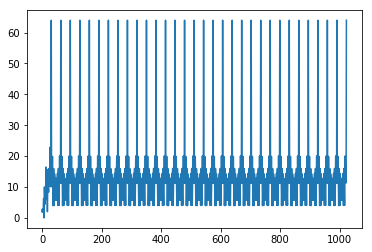

In [84]:
plt.plot(golden_R)

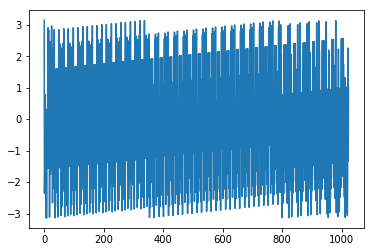

In [85]:
plt.plot(golden_T)

In [86]:
print("Golden thetas at the R peaks are:\n {}\n {}\n {}\n {}\n {}\n {}\n {}\n {}\n {}\n {}\n {}\n {}\n {}\n {}\n {}\n {}\n".format(golden_T[31],golden_T[63],golden_T[95],golden_T[127],golden_T[159],golden_T[191],golden_T[223],golden_T[255],golden_T[287],golden_T[319],golden_T[351],golden_T[383],golden_T[415],golden_T[447],golden_T[479],golden_T[511]))

Golden thetas at the R peaks are:
 0.015529000200331211
 0.047508999705314636
 0.07948499917984009
 0.1115259975194931
 0.1434909999370575
 0.1754709929227829
 0.2074970006942749
 0.23947599530220032
 0.27150198817253113
 0.3034819960594177
 0.3355030119419098
 0.367482990026474
 0.399507999420166
 0.4314880073070526
 0.4635140001773834
 0.49549400806427



## Complete the following block

In [87]:
from pynq import MMIO
import random
import pynq.lib.dma
# Allocate CMA array for DMA

# Copy regular numpy arrays to CMA arrays

# Write length using MMIO (we got the address from Vivado)

# Begin data transfer from/to DMA

# Free the CMA buffers

dma1 = dmaIR # first DMA. Note that we had to access the hierarchy before accessing the DMA
dma2 = dmaQT # second DM

pd_ip = MMIO(0x40000000, 0x10000) # we got this address from
length = 1024

in_buffer1 = xlnk.cma_array(shape=(length,), dtype=np.float32) # input buffer 1
in_buffer2 = xlnk.cma_array(shape=(length,), dtype=np.float32) # input buffer 2
out_bufferR = xlnk.cma_array(shape=(length,), dtype=np.float32) # output buffer
out_bufferT = xlnk.cma_array(shape=(length,), dtype=np.float32) # output buffer

np.copyto(in_buffer1, inp_I)
np.copyto(in_buffer2, inp_Q)

pd_ip.write(0x10, length) # we got this address from Vivado source. Since we didn't do port=return, and we set a constant for ap_start, we only have to write length.

dma1.sendchannel.transfer(in_buffer1)
dma2.sendchannel.transfer(in_buffer2)

dma1.recvchannel.transfer(out_bufferR)
dma2.recvchannel.transfer(out_bufferT)

in_buffer1.close()
in_buffer2.close()

out_bufferR.close()
out_bufferT.close()


print(t_after_bitstream - t_before_bitstream, 'seconds to execute on hardware')

0.11792111396789551 seconds to execute on hardware


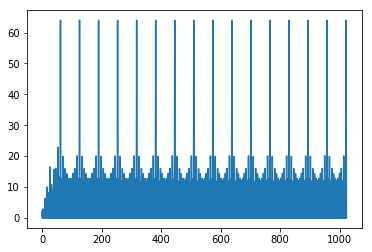

In [88]:
plt.plot(out_bufferR)

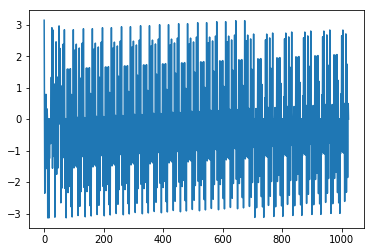

In [89]:
plt.plot(out_bufferT)

In [90]:
print("Output thetas at the R peaks are:\n {}\n {}\n {}\n {}\n {}\n {}\n {}\n {}\n {}\n {}\n {}\n {}\n {}\n {}\n {}\n {}\n".format(out_bufferT[31],out_bufferT[63],out_bufferT[95],out_bufferT[127],out_bufferT[159],out_bufferT[191],out_bufferT[223],out_bufferT[255],out_bufferT[287],out_bufferT[319],out_bufferT[351],out_bufferT[383],out_bufferT[415],out_bufferT[447],out_bufferT[479],out_bufferT[511]))

Output thetas at the R peaks are:
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0



In [91]:
print(out_bufferR[0:20])

[1.9999999e+00 0.0000000e+00 2.8298409e+00 0.0000000e+00 2.0000038e+00
 0.0000000e+00 2.8256018e+00 0.0000000e+00 2.0020003e+00 0.0000000e+00
 6.3112717e+00 0.0000000e+00 5.9939961e+00 0.0000000e+00 8.0202110e-03
 0.0000000e+00 1.0013989e+01 0.0000000e+00 6.3188605e+00 0.0000000e+00]
